In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(url)

In [4]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
df.shape

(299, 13)

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Cleaning the data

In [9]:
# Missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
# Duplicated values
df.duplicated().sum()

0

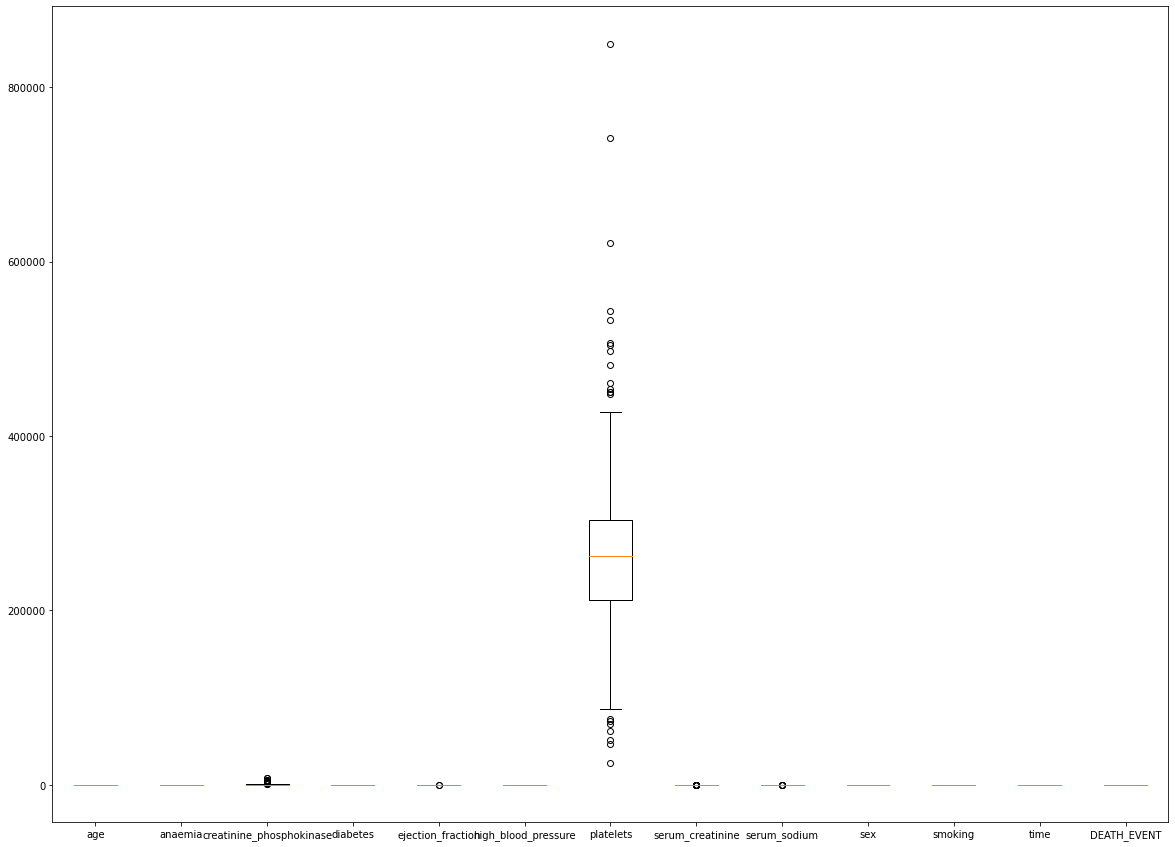

In [11]:
# Outliers values
plt.figure(figsize=(20, 15))
plt.boxplot(df, labels=df.columns)
plt.show()

Creatinine phosphokinase column

In [12]:
df.creatinine_phosphokinase.describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

Text(0.5, 1.0, 'Outliers values')

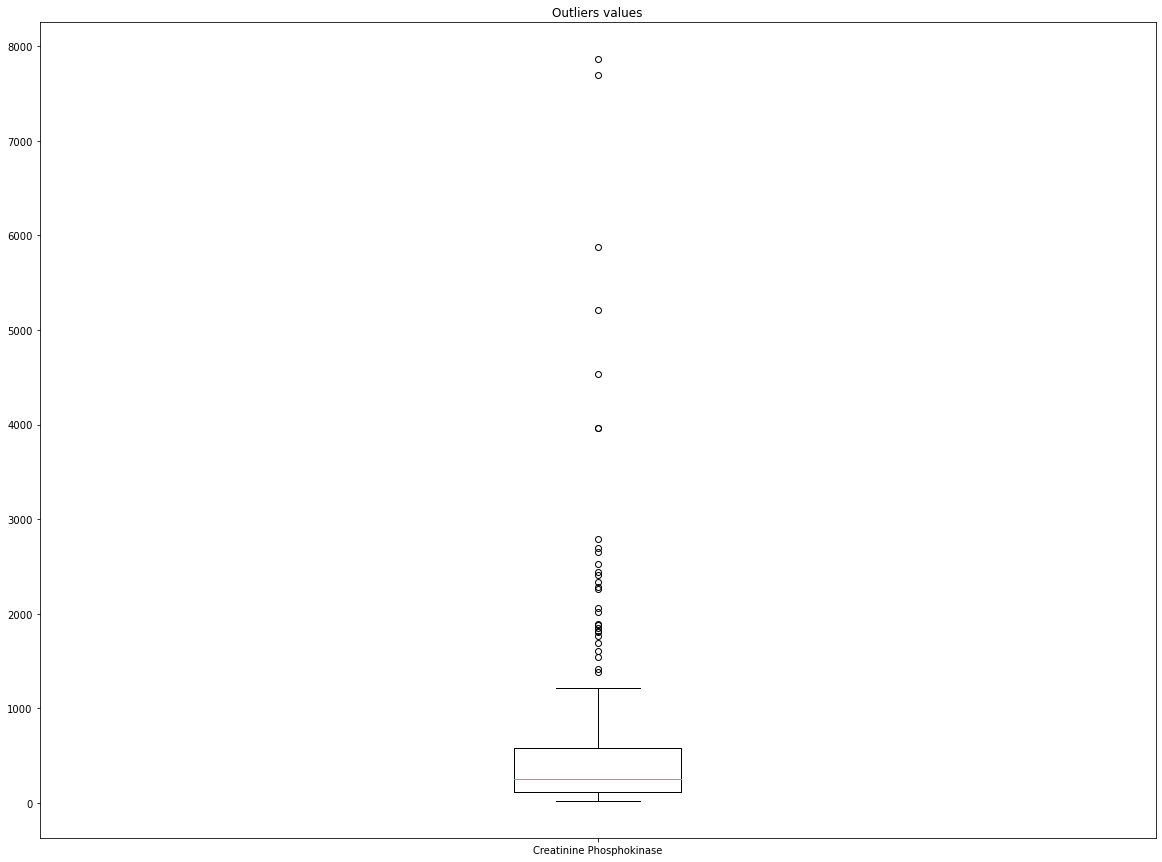

In [13]:
plt.figure(figsize=(20, 15))
plt.boxplot(df['creatinine_phosphokinase'], labels=['Creatinine Phosphokinase'])
plt.title('Outliers values')

In [14]:
# Removing outliers
q1 = df['creatinine_phosphokinase'].quantile(0.25)
q3 = df['creatinine_phosphokinase'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'creatinine_phosphokinase'] > toprange:
        df.loc[i, 'creatinine_phosphokinase'] = toprange
    if df.loc[i, 'creatinine_phosphokinase'] < botrange:
        df.loc[i, 'creatinine_phosphokinase'] = botrange

Text(0.5, 1.0, 'Cleaning values')

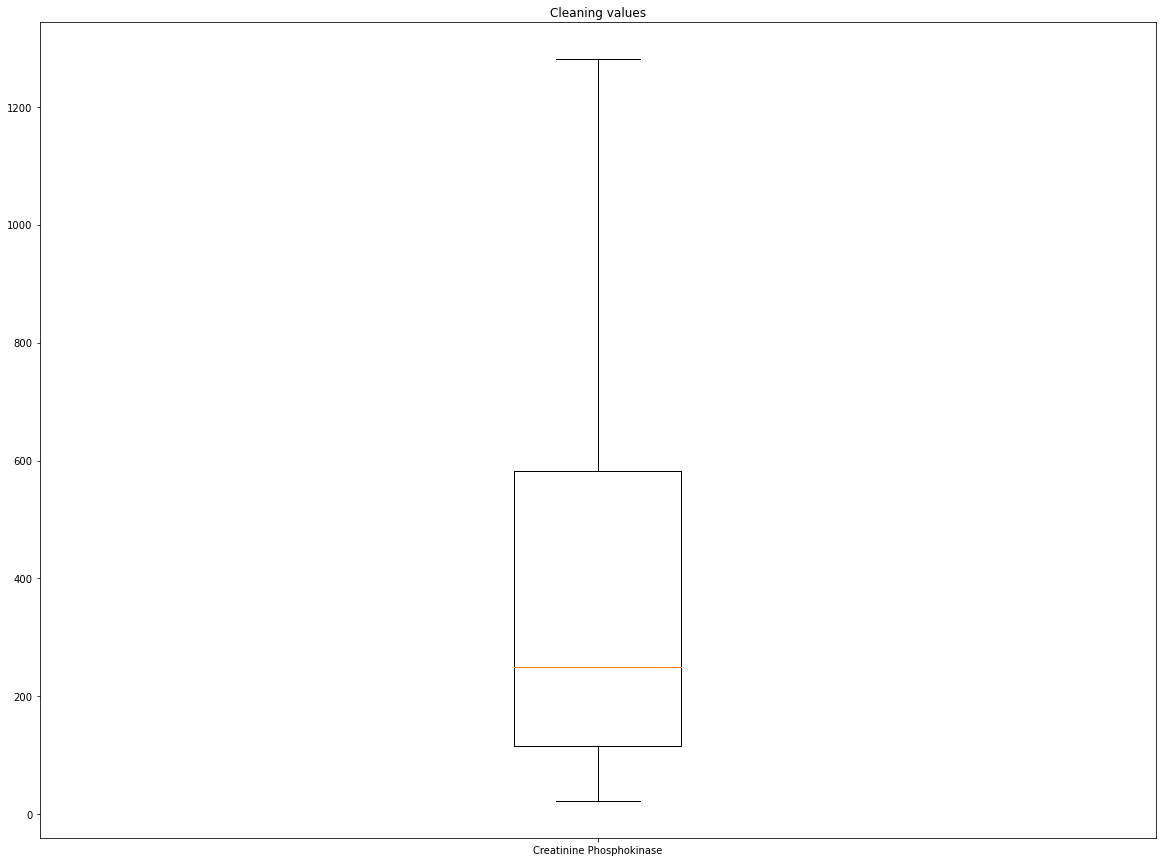

In [16]:
# Creatinine phosphokinase column after cleaning
plt.figure(figsize=(20, 15))
plt.boxplot(df['creatinine_phosphokinase'], labels=['Creatinine Phosphokinase'])
plt.title('Cleaning values')

Ejection fraction column

In [17]:
df.ejection_fraction.describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Text(0.5, 1.0, 'Outliers values')

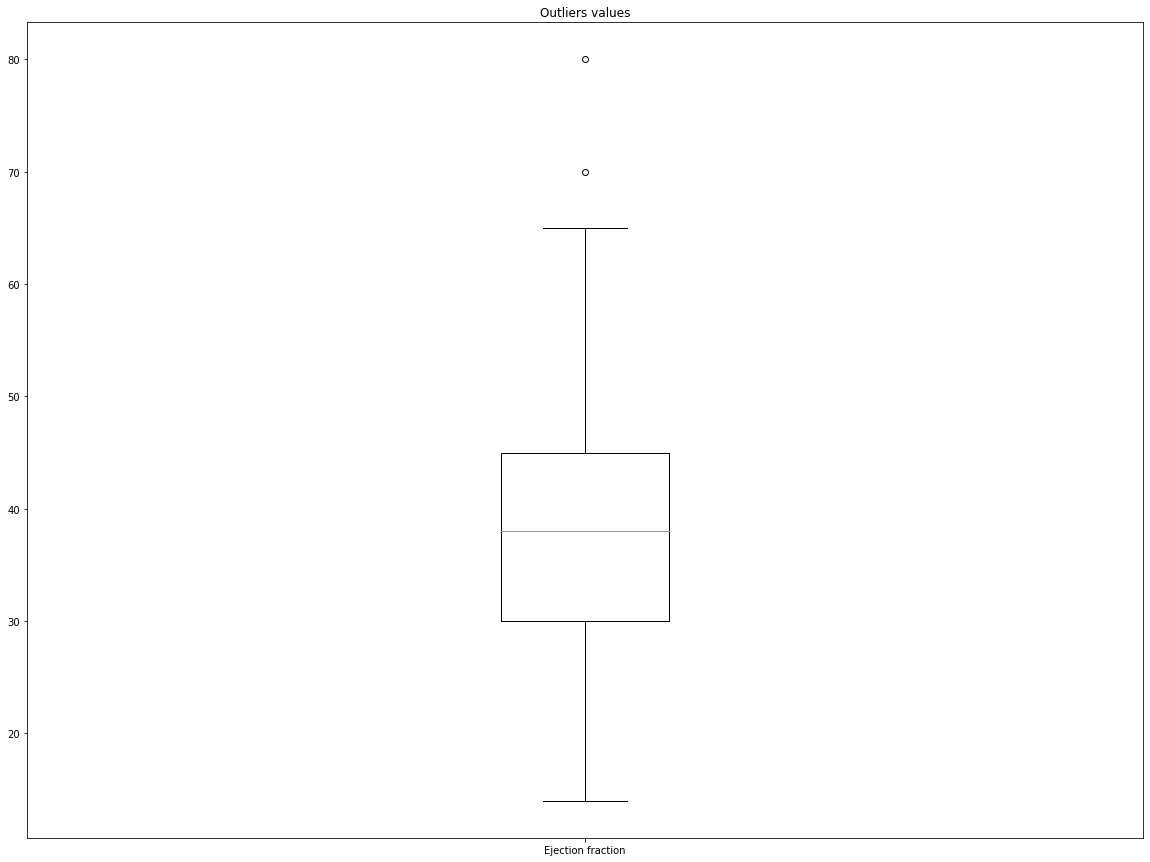

In [18]:
plt.figure(figsize=(20, 15))
plt.boxplot(df['ejection_fraction'], labels=['Ejection fraction'])
plt.title('Outliers values')

In [19]:
# Removing outliers
q1 = df['ejection_fraction'].quantile(0.25)
q3 = df['ejection_fraction'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'ejection_fraction'] > toprange:
        df.loc[i, 'ejection_fraction'] = toprange
    if df.loc[i, 'ejection_fraction'] < botrange:
        df.loc[i, 'ejection_fraction'] = botrange

Text(0.5, 1.0, 'Cleaning values')

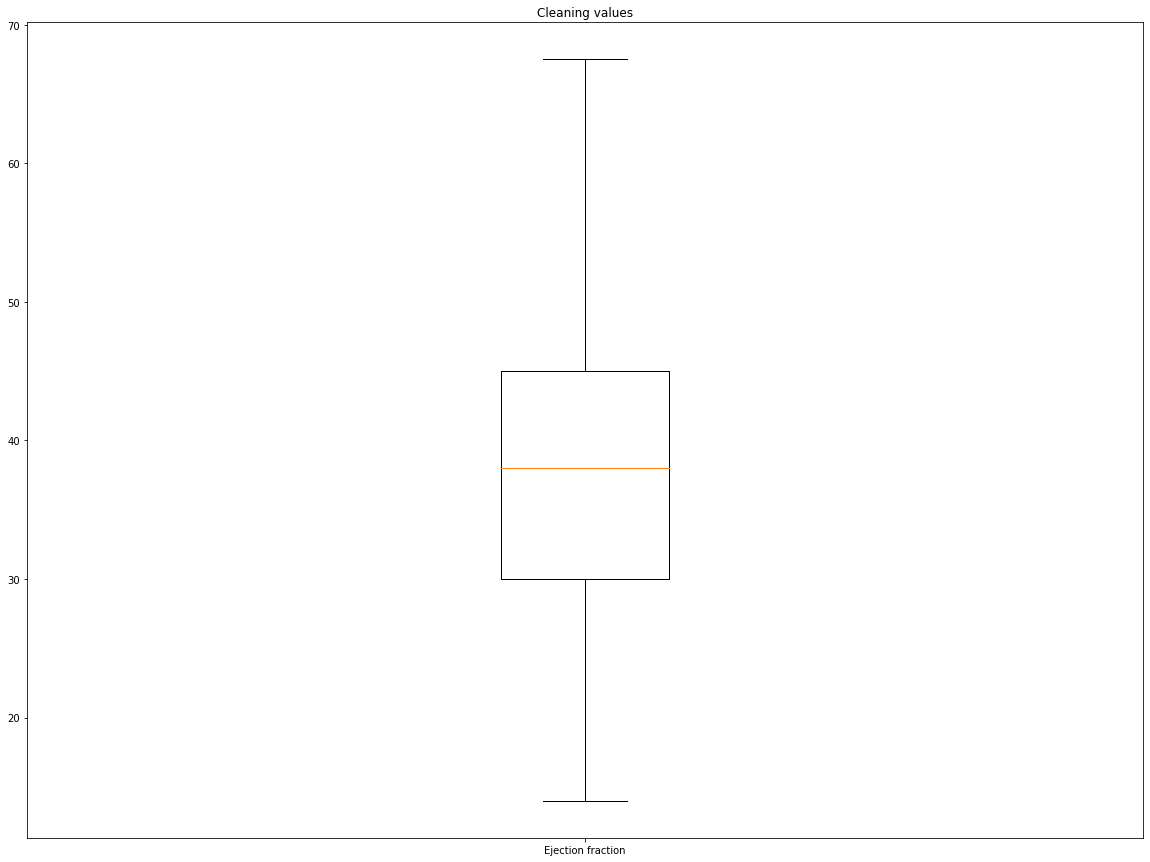

In [20]:
# Ejection fraction column after cleaning
plt.figure(figsize=(20, 15))
plt.boxplot(df['ejection_fraction'], labels=['Ejection fraction'])
plt.title('Cleaning values')

Platelets column

In [21]:
df.platelets.describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

Text(0.5, 1.0, 'Outliers values')

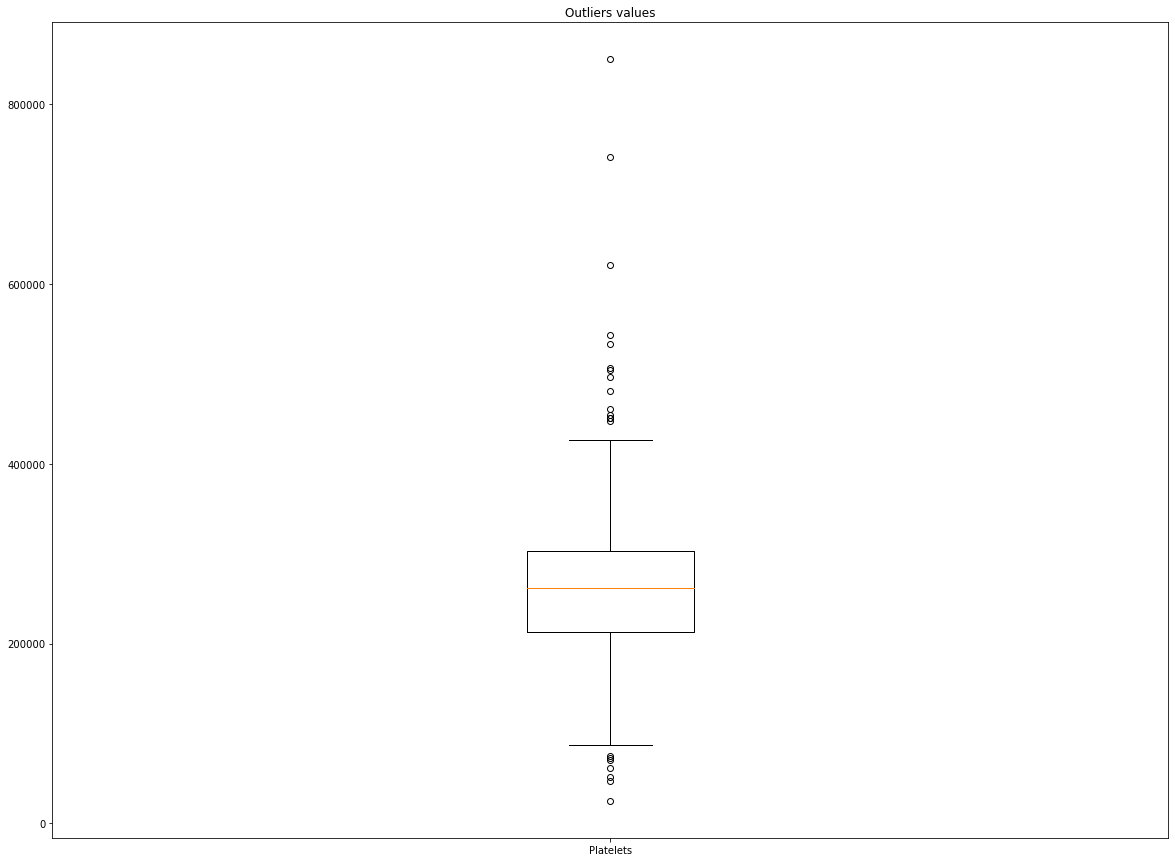

In [22]:
plt.figure(figsize=(20, 15))
plt.boxplot(df['platelets'], labels=['Platelets'])
plt.title('Outliers values')

In [23]:
# Removing outliers
q1 = df.platelets.quantile(0.25)
q3 = df.platelets.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'platelets'] > toprange:
        df.loc[i, 'platelets'] = toprange
    if df.loc[i, 'platelets'] < botrange:
        df.loc[i, 'platelets'] = botrange

Text(0.5, 1.0, 'Cleaning values')

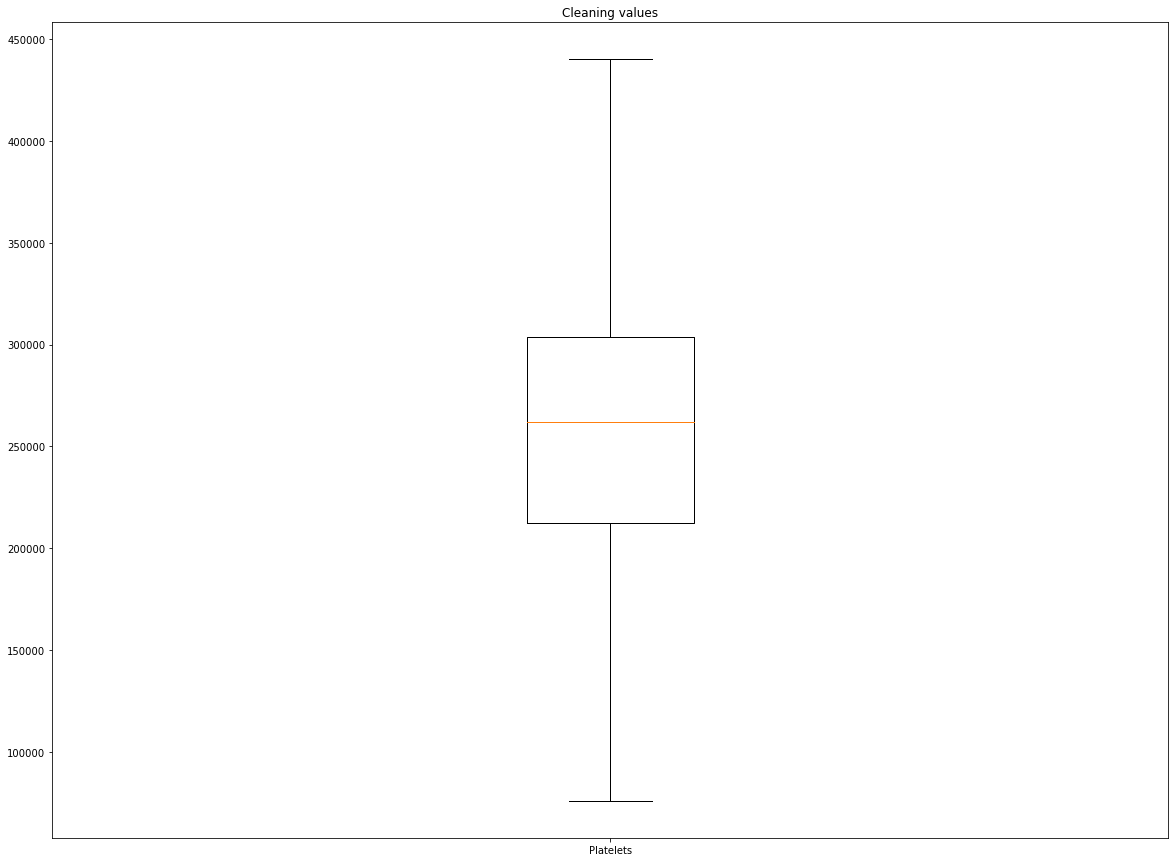

In [24]:
# Platelets column after cleaning
plt.figure(figsize=(20, 15))
plt.boxplot(df['platelets'], labels=['Platelets'])
plt.title('Cleaning values')

Serum creatinine column

In [25]:
df.serum_creatinine.describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

Text(0.5, 1.0, 'Outliers values')

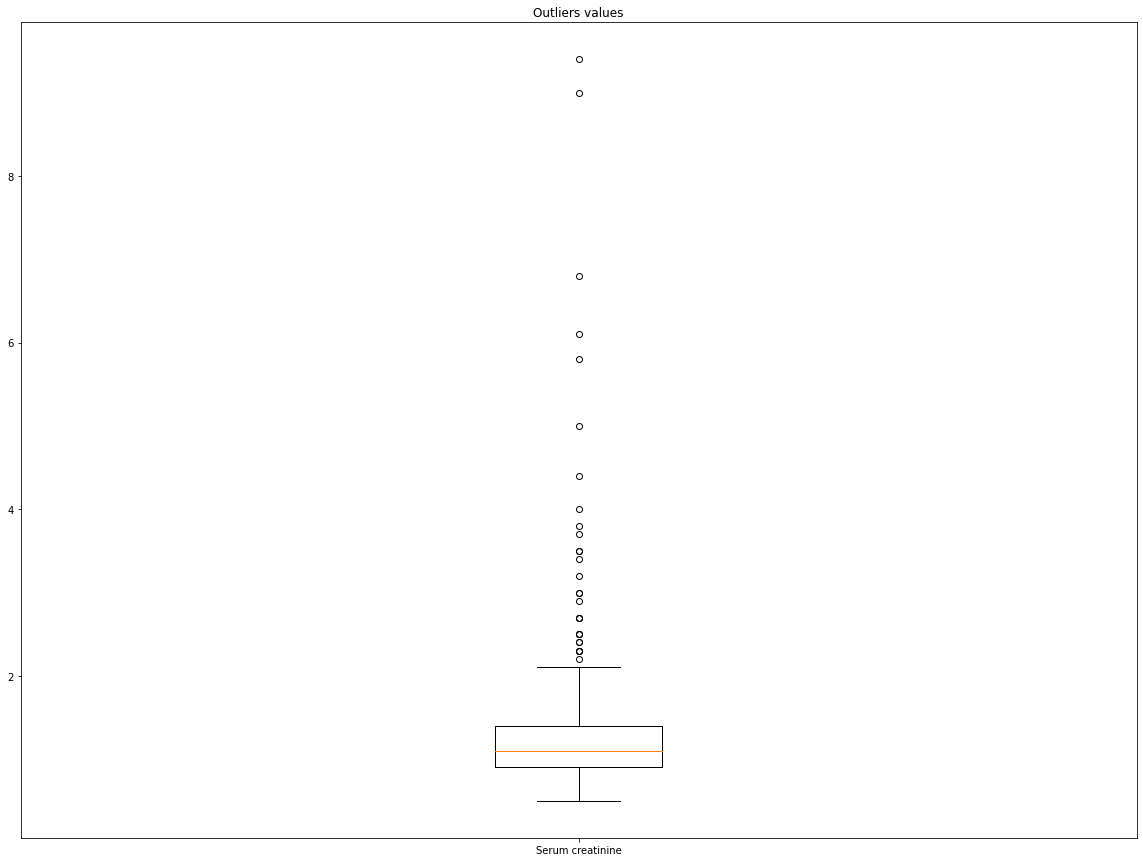

In [26]:
plt.figure(figsize=(20, 15))
plt.boxplot(df['serum_creatinine'], labels=['Serum creatinine'])
plt.title('Outliers values')

In [27]:
# Removing outliers
q1 = df.serum_creatinine.quantile(0.25)
q3 = df.serum_creatinine.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'serum_creatinine'] > toprange:
        df.loc[i, 'serum_creatinine'] = toprange
    if df.loc[i, 'serum_creatinine'] < botrange:
        df.loc[i, 'serum_creatinine'] = botrange

Text(0.5, 1.0, 'Cleaning values')

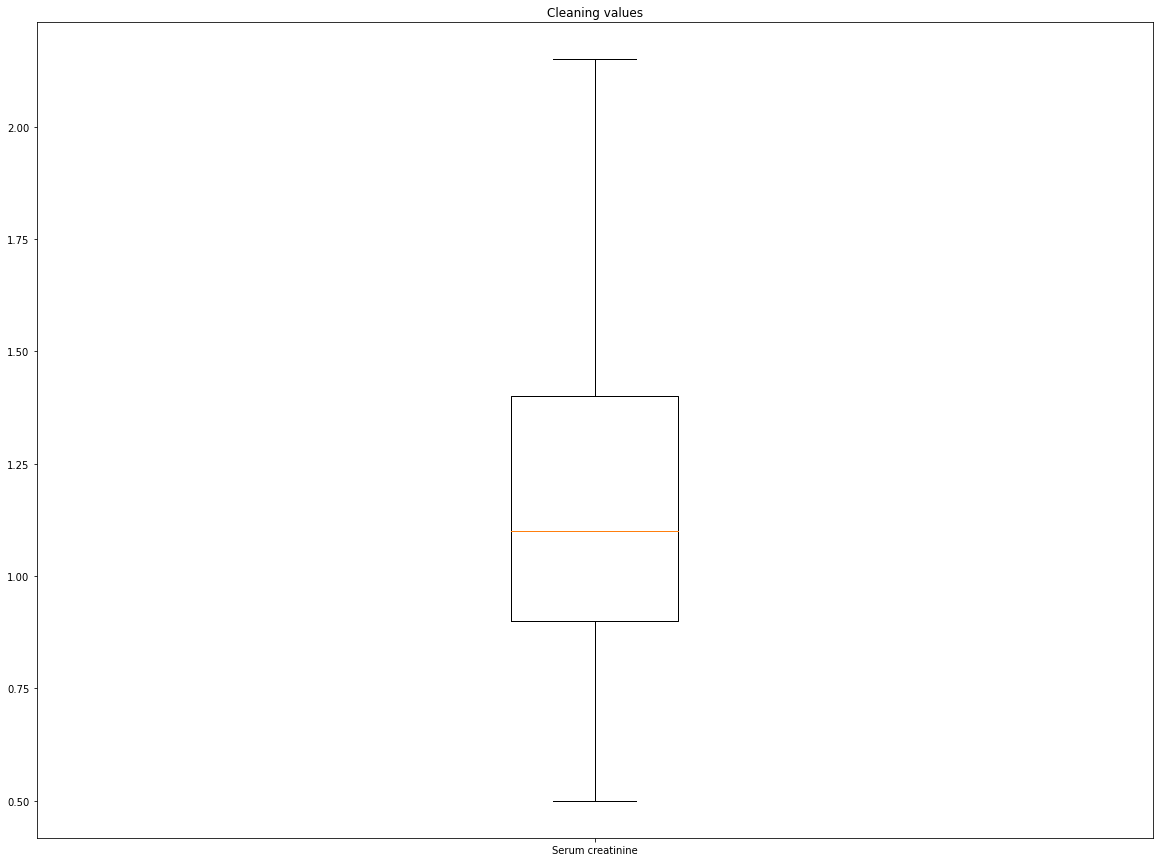

In [28]:
# Platelets column after cleaning
plt.figure(figsize=(20, 15))
plt.boxplot(df['serum_creatinine'], labels=['Serum creatinine'])
plt.title('Cleaning values')

Serum sodium column

In [29]:
df.serum_sodium.describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

Text(0.5, 1.0, 'Outliers values')

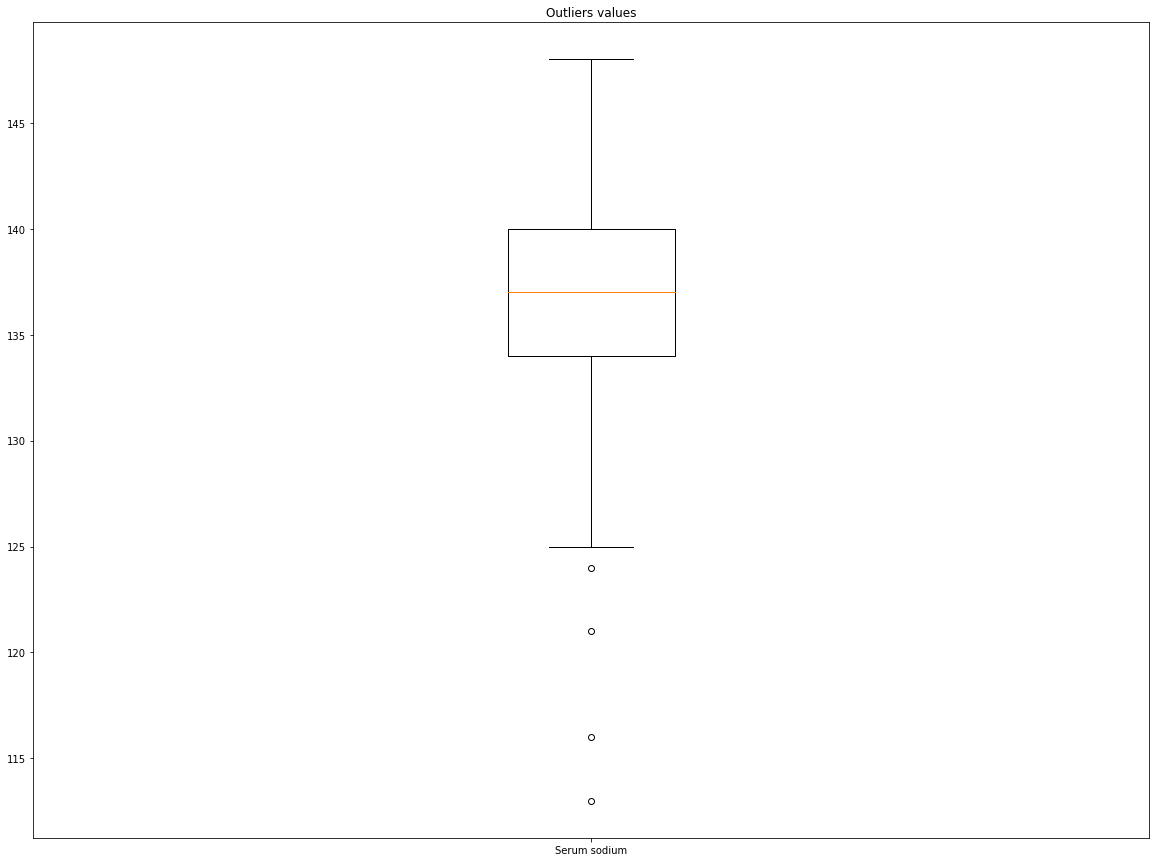

In [30]:
plt.figure(figsize=(20, 15))
plt.boxplot(df['serum_sodium'], labels=['Serum sodium'])
plt.title('Outliers values')

In [31]:
# Removing outliers
q1 = df.serum_sodium.quantile(0.25)
q3 = df.serum_sodium.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'serum_sodium'] > toprange:
        df.loc[i, 'serum_sodium'] = toprange
    if df.loc[i, 'serum_sodium'] < botrange:
        df.loc[i, 'serum_sodium'] = botrange

Text(0.5, 1.0, 'Cleaning values')

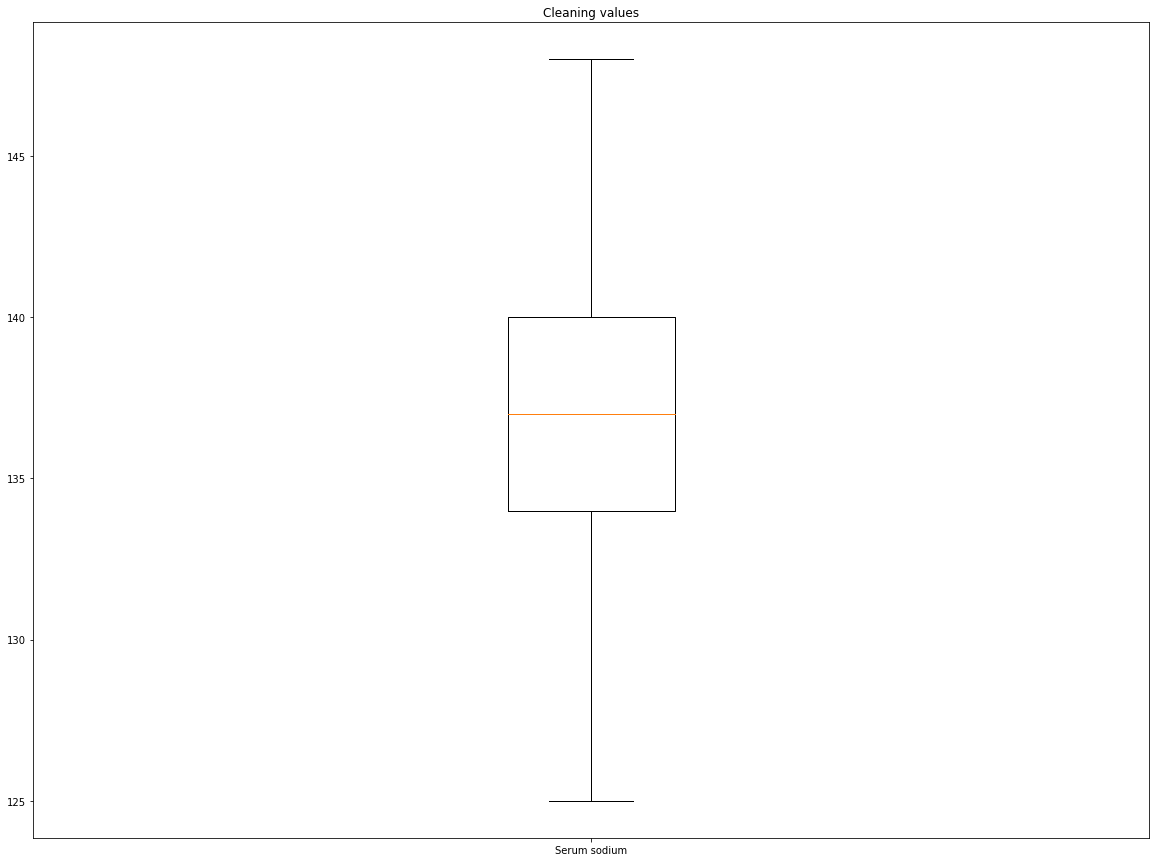

In [32]:
# Serum sodium column after cleaning
plt.figure(figsize=(20, 15))
plt.boxplot(df['serum_sodium'], labels=['Serum sodium'])
plt.title('Cleaning values')

Data After Cleaning Outliers

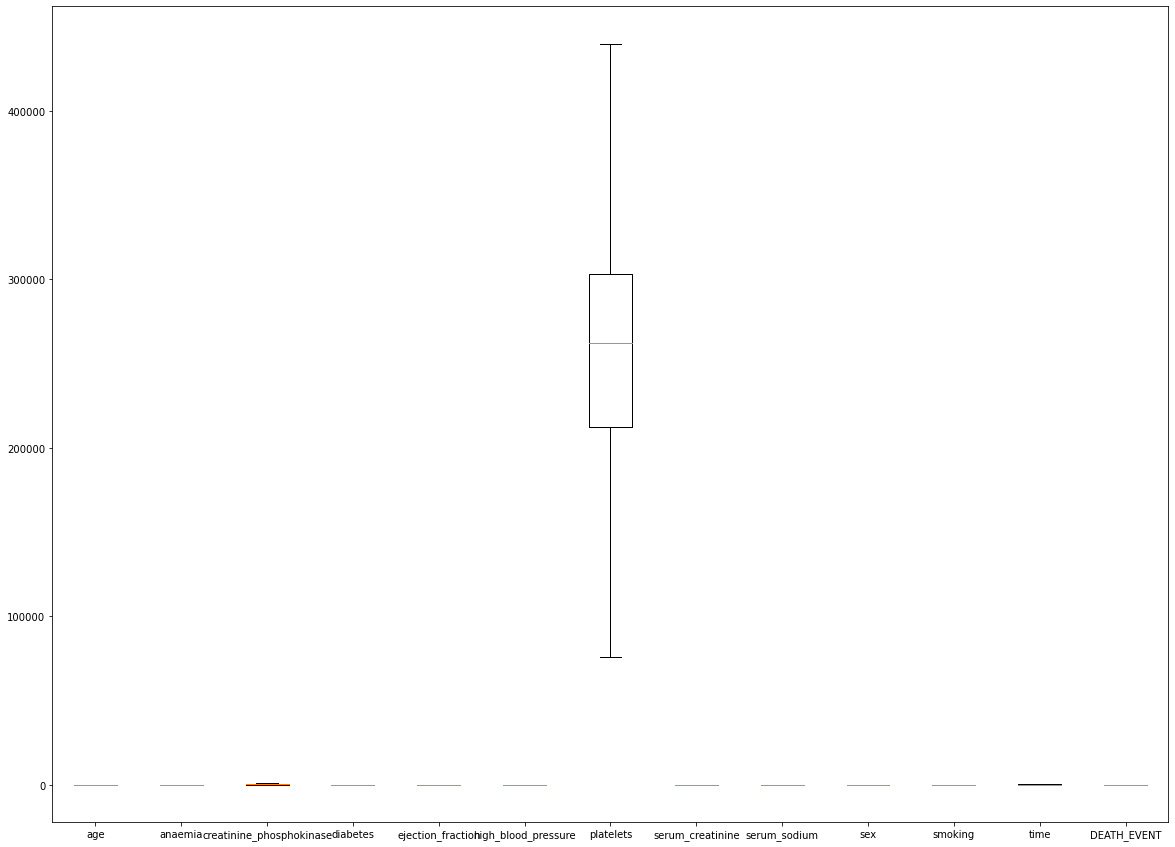

In [33]:
plt.figure(figsize=(20, 15))
plt.boxplot(df, labels=df.columns)
plt.show()

Unnecessary Data

In [34]:
df.drop('time', axis=1, inplace=True)

# Exploring the data

In [35]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130.0,1,0,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136.0,1,0,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129.0,1,1,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137.0,1,0,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125.0,0,0,1
5,90.0,1,47.00,0,40.0,1,204000.00,2.10,132.0,1,1,1
6,75.0,1,246.00,0,15.0,0,127000.00,1.20,137.0,1,0,1
7,60.0,1,315.00,1,60.0,0,440000.00,1.10,131.0,1,1,1
8,65.0,0,157.00,0,65.0,0,263358.03,1.50,138.0,0,0,1
9,80.0,1,123.00,0,35.0,1,388000.00,2.15,133.0,1,1,1


In [36]:
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
289,90.0,1,337.00,0,38.0,0,390000.0,0.9,144.0,0,0,0
290,45.0,0,615.00,1,55.0,0,222000.0,0.8,141.0,0,0,0
291,60.0,0,320.00,0,35.0,0,133000.0,1.4,139.0,1,0,0
292,52.0,0,190.00,1,38.0,0,382000.0,1.0,140.0,1,1,0
293,63.0,1,103.00,1,35.0,0,179000.0,0.9,136.0,1,1,0
294,62.0,0,61.00,1,38.0,1,155000.0,1.1,143.0,1,1,0
295,55.0,0,1280.25,0,38.0,0,270000.0,1.2,139.0,0,0,0
296,45.0,0,1280.25,1,60.0,0,440000.0,0.8,138.0,0,0,0
297,45.0,0,1280.25,0,38.0,0,140000.0,1.4,140.0,1,1,0
298,50.0,0,196.00,0,45.0,0,395000.0,1.6,136.0,1,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 28.2 KB


In [39]:
df.loc[:, ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].describe()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,424.214883,38.033445,259163.714883,1.234515,136.712375
std,385.449328,11.685643,81478.304369,0.440098,4.076971
min,23.000000,14.000000,76000.000000,0.500000,125.000000
25%,116.500000,30.000000,212500.000000,0.900000,134.000000
50%,250.000000,38.000000,262000.000000,1.100000,137.000000
75%,582.000000,45.000000,303500.000000,1.400000,140.000000
max,1280.250000,67.500000,440000.000000,2.150000,148.000000


Anaemia is a boolean column (  0:non anaemic patient   -   1:anaemic patient  )

In [52]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [44]:
# Ages with anaemia cases
df.groupby('anaemia')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
anaemia,,,,,,,,
0,170.0,59.923529,11.906441,40.0,50.0,60.0,70.0,94.0
1,129.0,62.033597,11.818421,40.0,53.0,60.0,68.0,95.0


In [50]:
# Some of ages in each anaemia case
df.groupby('anaemia')['age'].unique()

anaemia
0    [75.0, 55.0, 65.0, 62.0, 45.0, 53.0, 80.0, 70....
1    [50.0, 65.0, 90.0, 75.0, 60.0, 80.0, 45.0, 49....
Name: age, dtype: object

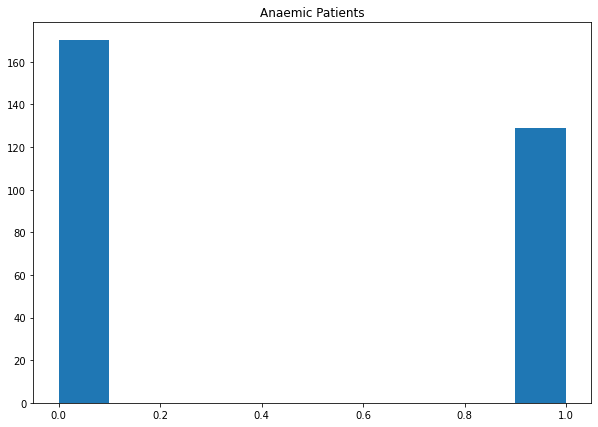

In [51]:
plt.figure(figsize=(10, 7))
plt.hist(df.anaemia, histtype='bar')
plt.title('Anaemic Patients')
plt.show()

Diabetes is a boolean column (  0:non diabetic patient  -  1:diabetic patient)

In [53]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [54]:
# Ages with diabetes cases
df.groupby('diabetes')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,174.0,61.850575,12.721134,40.0,52.0,60.0,70.0,95.0
1,125.0,59.418672,10.525180,40.0,50.0,60.0,65.0,94.0


In [55]:
# Some of ages in each diabetes case
df.groupby('diabetes')['age'].unique()

diabetes
0    [75.0, 55.0, 65.0, 50.0, 90.0, 80.0, 62.0, 45....
1    [65.0, 60.0, 48.0, 53.0, 75.0, 80.0, 70.0, 82....
Name: age, dtype: object

In [56]:
# Patients of diabetes and anaemia cases
df.groupby('diabetes')['anaemia'].value_counts()

diabetes  anaemia
0         0          98
          1          76
1         0          72
          1          53
Name: anaemia, dtype: int64

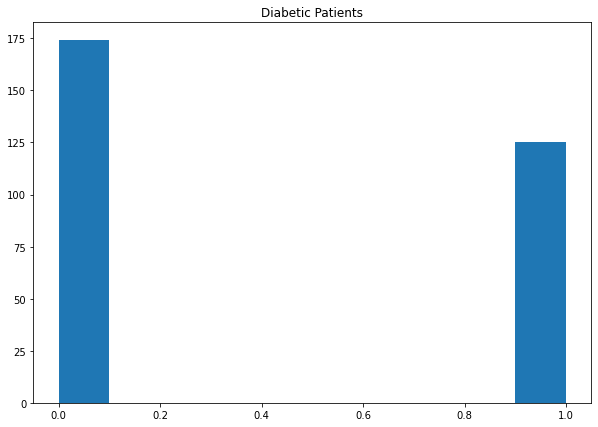

In [57]:
plt.figure(figsize=(10, 7))
plt.hist(df.diabetes, histtype='bar')
plt.title('Diabetic Patients')
plt.show()

High Blood Pressure is a boolean column ( 0:non hypertension patient - 1:hypertension patient)

In [58]:
df.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [59]:
# Ages with hypertension cases
df.groupby('high_blood_pressure')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
high_blood_pressure,,,,,,,,
0,194.0,60.018902,12.045547,40.0,50.0,60.0,66.5,95.0
1,105.0,62.339686,11.516151,40.0,53.0,62.0,70.0,95.0


In [60]:
# Some of ages in each hypertension case
df.groupby('high_blood_pressure')['age'].unique()

high_blood_pressure
0    [55.0, 65.0, 50.0, 75.0, 60.0, 45.0, 82.0, 87....
1    [75.0, 90.0, 80.0, 62.0, 50.0, 49.0, 70.0, 65....
Name: age, dtype: object

In [62]:
# Patients of hypertension and anaemia cases
df.groupby('high_blood_pressure')['anaemia'].value_counts()

high_blood_pressure  anaemia
0                    0          113
                     1           81
1                    0           57
                     1           48
Name: anaemia, dtype: int64

In [63]:
# Patients of hypertension and diabetes cases
df.groupby('high_blood_pressure')['diabetes'].value_counts()

high_blood_pressure  diabetes
0                    0           112
                     1            82
1                    0            62
                     1            43
Name: diabetes, dtype: int64

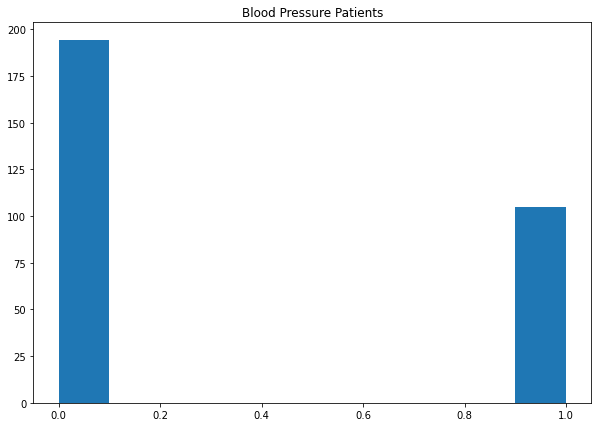

In [64]:
plt.figure(figsize=(10, 7))
plt.hist(df.high_blood_pressure, histtype='bar')
plt.title('Blood Pressure Patients')
plt.show()

sex is a boolean column (  0:females    -     1:males)

In [65]:
df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [67]:
# Ages in each gender
df.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,105.0,59.777781,11.240919,40.0,50.0,60.0,66.0,95.0
1,194.0,61.405500,12.224415,40.0,52.0,60.0,70.0,95.0


In [68]:
# Some of ages in each gender
df.groupby('sex')['age'].unique()

sex
0    [65.0, 49.0, 70.0, 48.0, 75.0, 95.0, 50.0, 82....
1    [75.0, 55.0, 65.0, 50.0, 90.0, 60.0, 80.0, 62....
Name: age, dtype: object

In [71]:
# Gender of patients in each anaemia case
df.groupby('sex')['anaemia'].value_counts()

sex  anaemia
0    0           53
     1           52
1    0          117
     1           77
Name: anaemia, dtype: int64

In [72]:
# Gender of patients in each diabetes case
df.groupby('sex')['diabetes'].value_counts()

sex  diabetes
0    1            55
     0            50
1    0           124
     1            70
Name: diabetes, dtype: int64

In [73]:
# Gender of patients in each hypertension case
df.groupby('sex')['high_blood_pressure'].value_counts()

sex  high_blood_pressure
0    0                       61
     1                       44
1    0                      133
     1                       61
Name: high_blood_pressure, dtype: int64

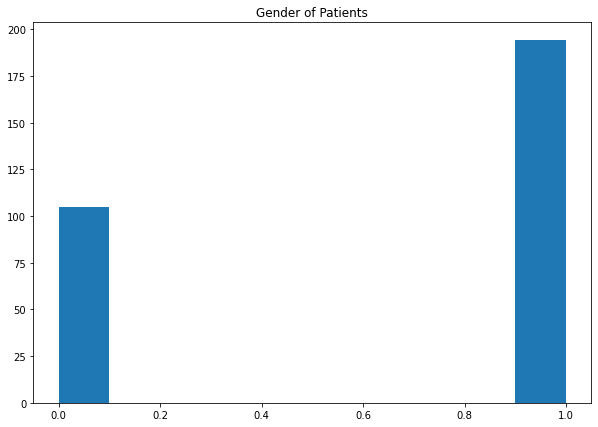

In [74]:
plt.figure(figsize=(10, 7))
plt.hist(df.sex, histtype='bar')
plt.title('Gender of Patients')
plt.show()

Smoking is a boolean column (  0:non smoker    -    1:smoker)

In [75]:
df.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [77]:
# Ages with smoking cases
df.groupby('smoking')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
smoking,,,,,,,,
0,203.0,60.681448,12.157714,40.0,50.0,60.0,68.5,95.0
1,96.0,61.156250,11.374328,40.0,52.0,60.0,70.0,90.0


In [78]:
# Some of ages in each smoking cases
df.groupby('smoking')['age'].unique()

smoking
0    [75.0, 55.0, 50.0, 65.0, 45.0, 49.0, 82.0, 87....
1    [65.0, 90.0, 60.0, 80.0, 75.0, 62.0, 68.0, 70....
Name: age, dtype: object

In [79]:
# Patients of smoking and anaemia cases
df.groupby('smoking')['anaemia'].value_counts()

smoking  anaemia
0        0          108
         1           95
1        0           62
         1           34
Name: anaemia, dtype: int64

In [80]:
# Patients of smoking and diabetes cases
df.groupby('smoking')['diabetes'].value_counts()

smoking  diabetes
0        0           108
         1            95
1        0            66
         1            30
Name: diabetes, dtype: int64

In [81]:
# Patients of smoking and hypertension cases
df.groupby('smoking')['high_blood_pressure'].value_counts()

smoking  high_blood_pressure
0        0                      128
         1                       75
1        0                       66
         1                       30
Name: high_blood_pressure, dtype: int64

In [82]:
# Gender of patients in each smoking case
df.groupby('sex')['smoking'].value_counts()

sex  smoking
0    0          101
     1            4
1    0          102
     1           92
Name: smoking, dtype: int64

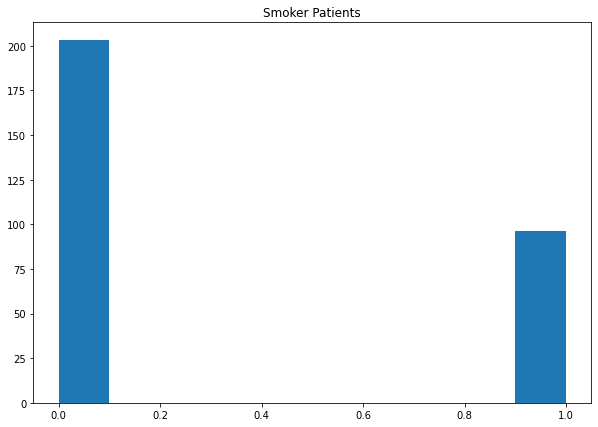

In [83]:
plt.figure(figsize=(10, 7))
plt.hist(df.smoking, histtype='bar')
plt.title('Smoker Patients')
plt.show()

Correlation between age/sex and the anaemia, diabetes, high blood pressure and smoking

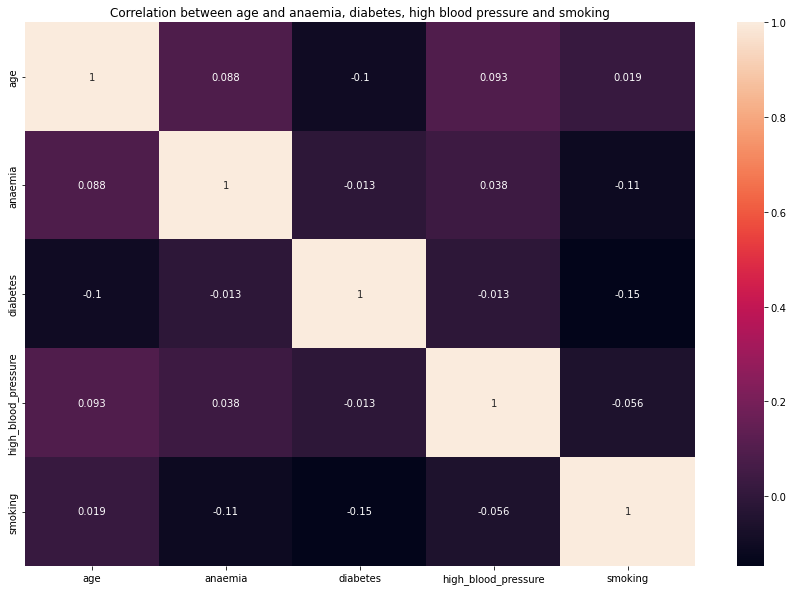

In [86]:
# Age
plt.figure(figsize=(15, 10))
sns.heatmap(df.loc[:, ['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking']].corr(), annot=True)
plt.title('Correlation between age and anaemia, diabetes, high blood pressure and smoking')
plt.show()

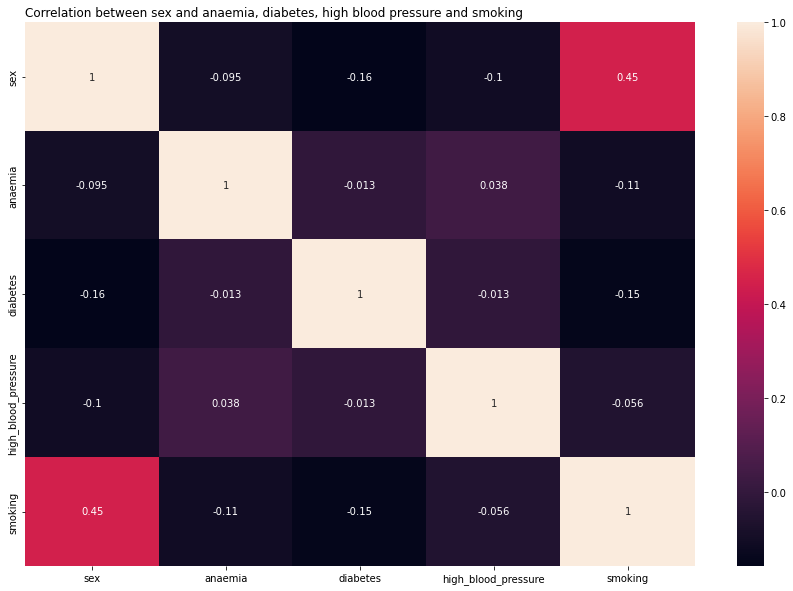

In [88]:
# Sex
plt.figure(figsize=(15, 10))
sns.heatmap(df.loc[:, ['sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking']].corr(), annot=True)
plt.title('Correlation between sex and anaemia, diabetes, high blood pressure and smoking', loc='left')
plt.show()

# Death cases

DEATH EVENT is a boolean column (   0:alive patient  -  1:dead patient)

In [89]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [93]:
# Ages with death cases
df.groupby('DEATH_EVENT')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,58.761906,10.637890,40.0,50.0,60.0,65.0,90.0
1,96.0,65.215281,13.214556,42.0,55.0,65.0,75.0,95.0


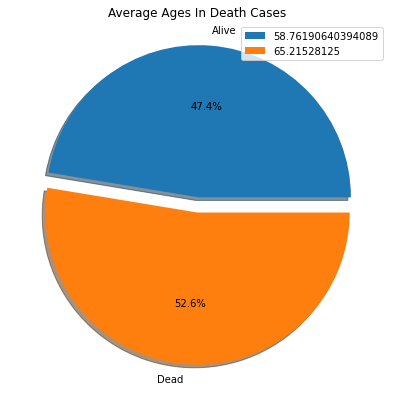

In [110]:
plt.figure(figsize=(10, 7))
death_age = df.groupby('DEATH_EVENT')['age'].mean()
myexplode = [0.1, 0]
plt.pie(death_age, autopct='%.1f%%', labels=['Alive', 'Dead'], explode=myexplode, shadow=True)
plt.title('Average Ages In Death Cases')
plt.legend(death_age, loc='upper right')
plt.show()

In [94]:
# Some of ages in each death cases
df.groupby('DEATH_EVENT')['age'].unique()

DEATH_EVENT
0    [49.0, 65.0, 53.0, 50.0, 60.0, 72.0, 70.0, 55....
1    [75.0, 55.0, 65.0, 50.0, 90.0, 60.0, 80.0, 62....
Name: age, dtype: object

In [95]:
# Patients of death and anaemia cases
df.groupby('DEATH_EVENT')['anaemia'].value_counts()

DEATH_EVENT  anaemia
0            0          120
             1           83
1            0           50
             1           46
Name: anaemia, dtype: int64

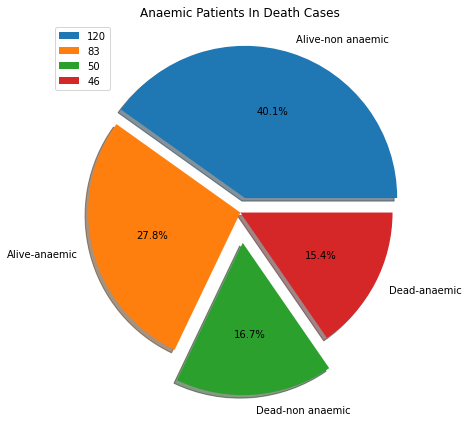

In [111]:
plt.figure(figsize=(10, 7))
death_anae = df.groupby('DEATH_EVENT')['anaemia'].value_counts()
myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_anae, autopct='%.1f%%', labels=['Alive-non anaemic', 'Alive-anaemic', 'Dead-non anaemic', 'Dead-anaemic'], explode=myexplode, shadow=True)
plt.title('Anaemic Patients In Death Cases')
plt.legend(death_anae, loc='upper left')
plt.show()

In [96]:
# Patients of death and diabetes cases
df.groupby('DEATH_EVENT')['diabetes'].value_counts()

DEATH_EVENT  diabetes
0            0           118
             1            85
1            0            56
             1            40
Name: diabetes, dtype: int64

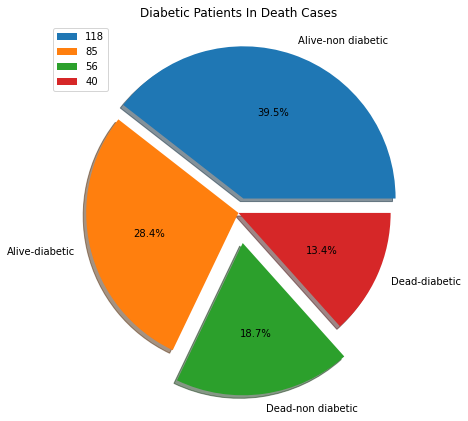

In [112]:
plt.figure(figsize=(10, 7))
death_diab = df.groupby('DEATH_EVENT')['diabetes'].value_counts()
myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_diab, autopct='%.1f%%', labels=['Alive-non diabetic', 'Alive-diabetic', 'Dead-non diabetic', 'Dead-diabetic'], explode=myexplode, shadow=True)
plt.title('Diabetic Patients In Death Cases')
plt.legend(death_diab, loc='upper left')
plt.show()

In [97]:
# Patients of death and hypertension cases
df.groupby('DEATH_EVENT')['high_blood_pressure'].value_counts()

DEATH_EVENT  high_blood_pressure
0            0                      137
             1                       66
1            0                       57
             1                       39
Name: high_blood_pressure, dtype: int64

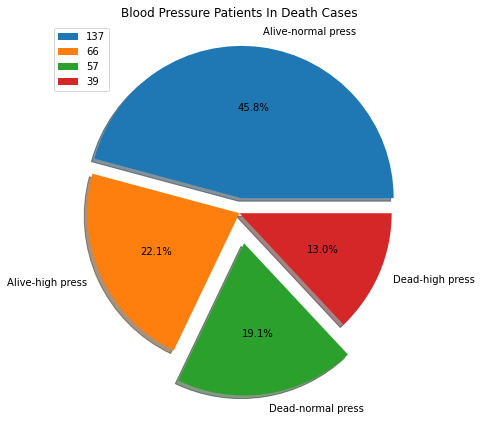

In [113]:
plt.figure(figsize=(10, 7))
death_hbp = df.groupby('DEATH_EVENT')['high_blood_pressure'].value_counts()
myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_hbp, autopct='%.1f%%', labels=['Alive-normal press', 'Alive-high press', 'Dead-normal press', 'Dead-high press'], explode=myexplode, shadow=True)
plt.title('Blood Pressure Patients In Death Cases')
plt.legend(death_hbp, loc='upper left')
plt.show()

In [98]:
# Patients of death and smoking cases
df.groupby('DEATH_EVENT')['smoking'].value_counts()

DEATH_EVENT  smoking
0            0          137
             1           66
1            0           66
             1           30
Name: smoking, dtype: int64

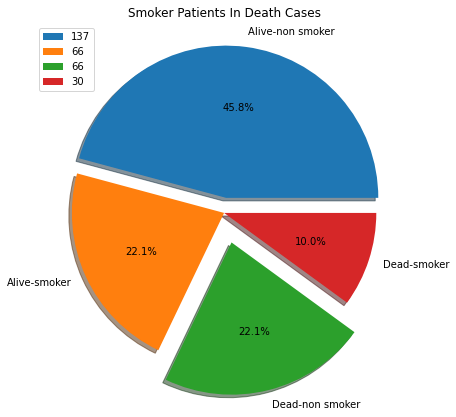

In [114]:
plt.figure(figsize=(10, 7))
death_smok = df.groupby('DEATH_EVENT')['smoking'].value_counts()
myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_smok, autopct='%.1f%%', labels=['Alive-non smoker', 'Alive-smoker', 'Dead-non smoker', 'Dead-smoker'], explode=myexplode, shadow=True)
plt.title('Smoker Patients In Death Cases')
plt.legend(death_smok, loc='upper left')
plt.show()

In [99]:
# Gender of patients in death cases
df.groupby('DEATH_EVENT')['sex'].value_counts()

DEATH_EVENT  sex
0            1      132
             0       71
1            1       62
             0       34
Name: sex, dtype: int64

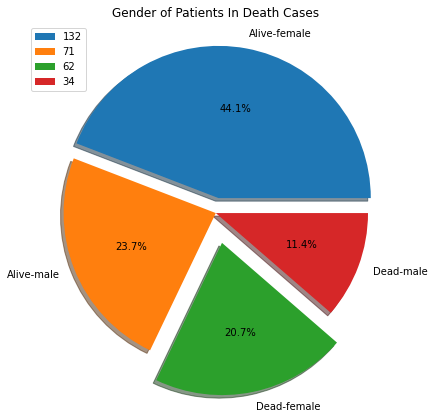

In [115]:
plt.figure(figsize=(10, 7))
death_sex = df.groupby('DEATH_EVENT')['sex'].value_counts()
myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_sex, autopct='%.1f%%', labels=['Alive-female', 'Alive-male', 'Dead-female', 'Dead-male'], explode=myexplode, shadow=True)
plt.title('Gender of Patients In Death Cases')
plt.legend(death_sex, loc='upper left')
plt.show()

In [100]:
# Average CPK enzyme in each death case
df.groupby('DEATH_EVENT')['creatinine_phosphokinase'].mean()

DEATH_EVENT
0    425.896552
1    420.658854
Name: creatinine_phosphokinase, dtype: float64

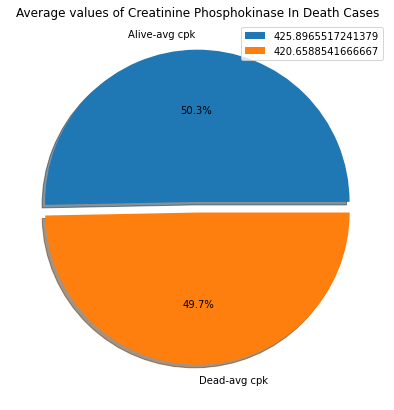

In [117]:
plt.figure(figsize=(10, 7))
death_cpk = df.groupby('DEATH_EVENT')['creatinine_phosphokinase'].mean()
myexplode = [0.07, 0]
plt.pie(death_cpk, autopct='%.1f%%', labels=['Alive-avg cpk', 'Dead-avg cpk'], explode=myexplode, shadow=True)
plt.title('Average values of Creatinine Phosphokinase In Death Cases')
plt.legend(death_cpk, loc='upper right')
plt.show()

In [101]:
# Average EF enzyme in each death case
df.groupby('DEATH_EVENT')['ejection_fraction'].mean()

DEATH_EVENT
0    40.204433
1    33.442708
Name: ejection_fraction, dtype: float64

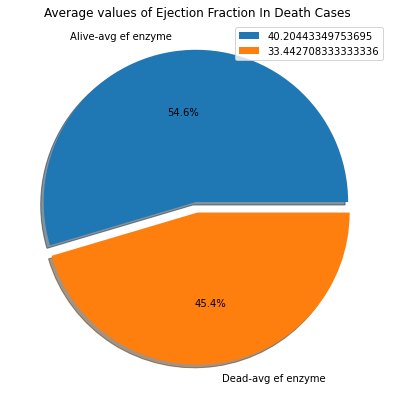

In [119]:
plt.figure(figsize=(10, 7))
death_ef = df.groupby('DEATH_EVENT')['ejection_fraction'].mean()
myexplode = [0.07, 0]
plt.pie(death_ef, autopct='%.1f%%', labels=['Alive-avg ef enzyme', 'Dead-avg ef enzyme'], explode=myexplode, shadow=True)
plt.title('Average values of Ejection Fraction In Death Cases')
plt.legend(death_ef, loc='upper right')
plt.show()

In [103]:
# Average count of platelets in each death case
df.groupby('DEATH_EVENT')['platelets'].mean()

DEATH_EVENT
0    261632.366749
1    253943.544792
Name: platelets, dtype: float64

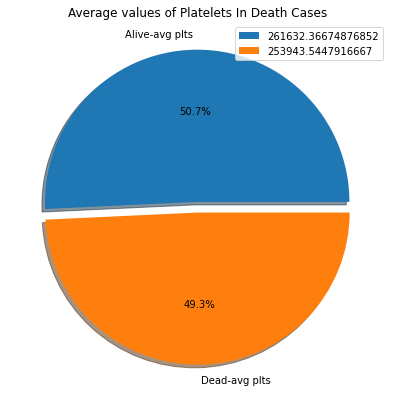

In [125]:
plt.figure(figsize=(10, 7))
death_plts = df.groupby('DEATH_EVENT')['platelets'].mean()
myexplode = [0.07, 0]
plt.pie(death_plts, autopct='%.1f%%', labels=['Alive-avg plts', 'Dead-avg plts'], explode=myexplode, shadow=True)
plt.title('Average values of Platelets In Death Cases')
plt.legend(death_plts, loc='upper right')
plt.show()

In [104]:
# Average Serum Creatinine in each death case
df.groupby('DEATH_EVENT')['serum_creatinine'].mean()

DEATH_EVENT
0    1.117143
1    1.482708
Name: serum_creatinine, dtype: float64

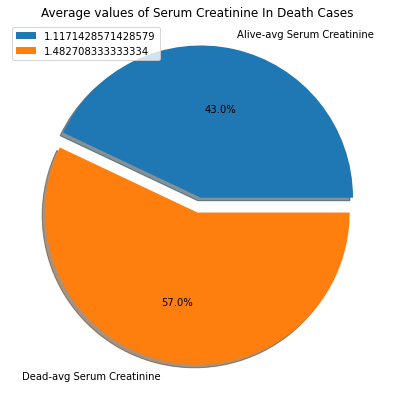

In [122]:
plt.figure(figsize=(10, 7))
death_SC = df.groupby('DEATH_EVENT')['serum_creatinine'].mean()
myexplode = [0.1, 0]
plt.pie(death_SC, autopct='%.1f%%', labels=['Alive-avg Serum Creatinine', 'Dead-avg Serum Creatinine'], explode=myexplode, shadow=True)
plt.title('Average values of Serum Creatinine In Death Cases')
plt.legend(death_SC, loc='upper left')
plt.show()

In [105]:
# Average Serum Sodium in each death case
df.groupby('DEATH_EVENT')['serum_sodium'].mean()

DEATH_EVENT
0    137.275862
1    135.520833
Name: serum_sodium, dtype: float64

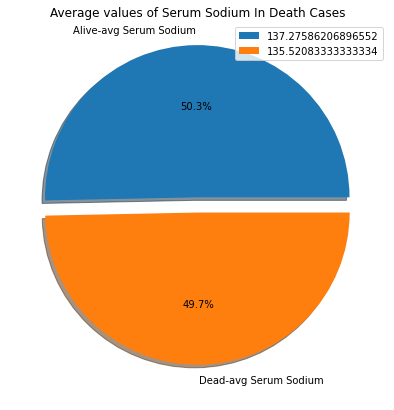

In [124]:
plt.figure(figsize=(10, 7))
death_SS = df.groupby('DEATH_EVENT')['serum_sodium'].mean()
myexplode = [0.1, 0]
plt.pie(death_SS, autopct='%.1f%%', labels=['Alive-avg Serum Sodium', 'Dead-avg Serum Sodium'], explode=myexplode, shadow=True)
plt.legend(death_SS, loc='upper right')
plt.title('Average values of Serum Sodium In Death Cases')
plt.show()


Correlation between Death cases and other factors

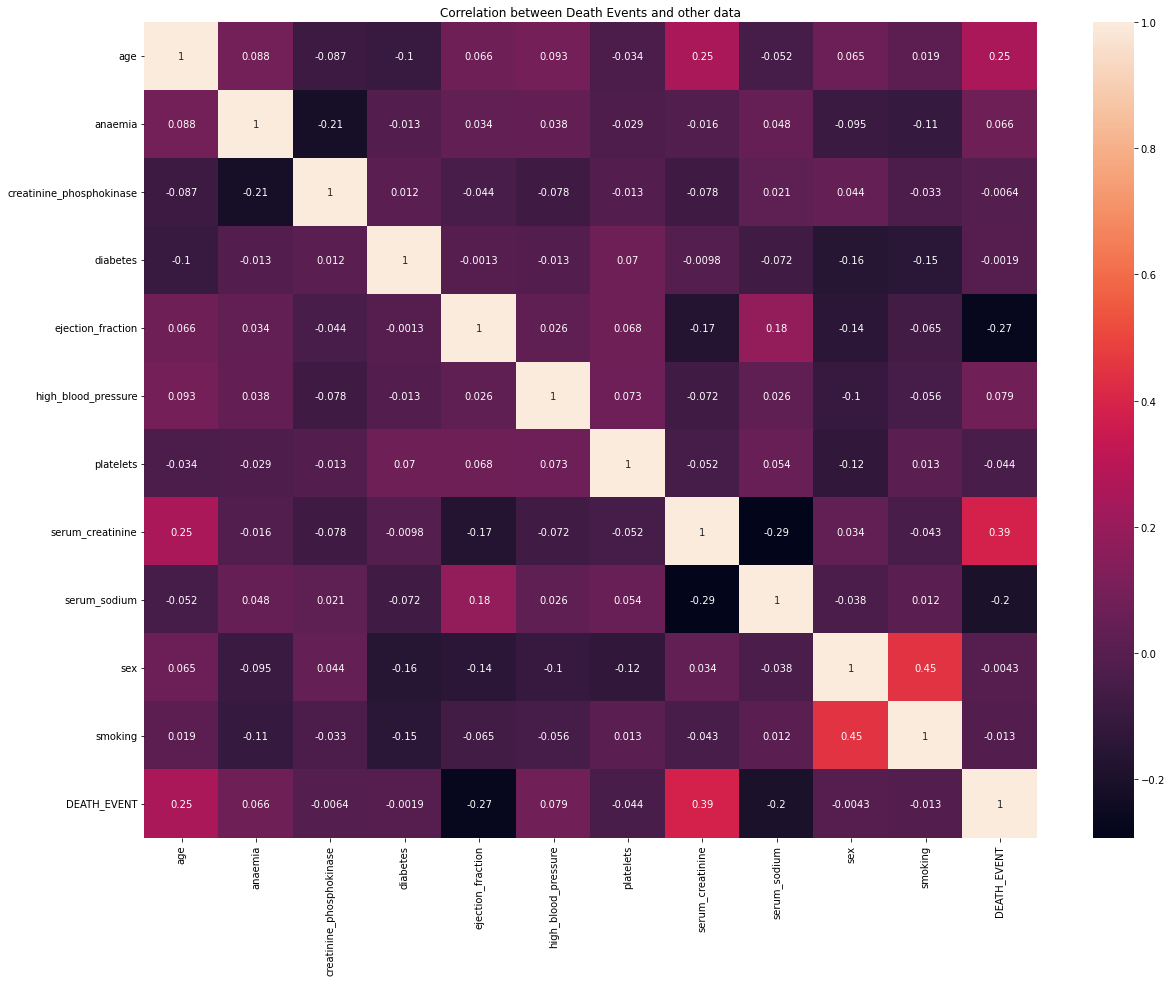

In [126]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between Death Events and other data')
plt.show()